In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Simple multi layer example

In [2]:
# Simple example of using placeholder and operation
# Notice that the rows fed to the placeholder is variable
np.random.seed(42)

m_mul = tf.placeholder(shape=(), dtype=tf.float32)
x_data = tf.placeholder(shape=(None, 5), dtype=tf.float32)
m_constant = tf.constant(10.)

product_ = tf.multiply(x_data, m_mul)  
product = tf.add(product_, m_constant)

with tf.Session() as sess:
    ans = sess.run(product, 
                   feed_dict={x_data: np.random.randint(0, 10, [5, 5]), 
                              m_mul: 3})
    print(ans)

[[ 28.  19.  31.  22.  28.]
 [ 37.  16.  28.  31.  22.]
 [ 19.  31.  31.  16.  25.]
 [ 22.  13.  31.  25.  13.]
 [ 22.  10.  37.  25.  34.]]


### Operations on an image like data, using convolution


In [3]:


dataset_shape = [1, 4, 4, 1] # There are 10 images of 128x128, with 3 channels
x = np.arange(1, 17, 1).reshape(dataset_shape) # Out training dataset

x_data = tf.placeholder(tf.float32, dataset_shape)
my_filter = tf.constant(0.25, shape=(2, 2, 1, 1))
my_stride = [1, 2, 2, 1]

mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_stride, padding='SAME', name='Moving_Avg_Window')

mov_avg_layer_sqeezed = tf.squeeze(mov_avg_layer) # To remove all 1 dim axis

# Size of output layer will be (4 + 4 - 2)/ 2 + 1 = 4x4

a = tf.constant([[1., 2.], [-1., 3.]])
b = tf.constant(1., shape=[2, 2])
temp1 = tf.matmul(a, mov_avg_layer_sqeezed)
temp = tf.add(temp1, b)

with tf.Session() as sess:
    a1 = sess.run(mov_avg_layer, feed_dict={x_data: x})
    b1 = tf.squeeze(a1)
    c = sess.run(tf.sigmoid(temp), feed_dict={x_data: x})
    
    print('b1\n', sess.run(b1), '\n')
    print('c\n', c, '\n')
    print('a\n', sess.run(a), '\n')

b1
 [[  3.5   5.5]
 [ 11.5  13.5]] 

c
 [[ 1.  1.]
 [ 1.  1.]] 

a
 [[ 1.  2.]
 [-1.  3.]] 



### Loss functions

- Tells the optimizer how good or bad the prediction is wrt actual. The job of the optimizer is to reduce this loss by altering values of the learnable parameters of the network.


### L1 and L2 loss (regression)

As far as regularization is concerned, L2 is prefered, because:

- L2 has only one solution, L1 can have many
- L2 encourages diffused matrices, L1 can have peaks


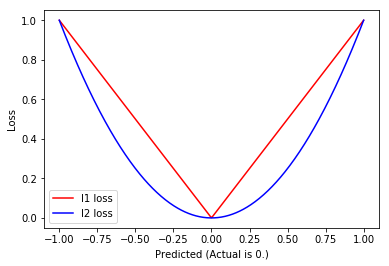

In [4]:
# For regression

x = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

l2_y_vals = tf.square(target - x)
l1_y_vals = tf.abs(target - x)

with tf.Session() as sess:
    x_ = sess.run(x)
    l1_loss = sess.run(l1_y_vals)
    l2_loss = sess.run(l2_y_vals)
    
plt.plot(x_, l1_loss, c='red', label='l1 loss')
plt.plot(x_, l2_loss, c='blue', label='l2 loss')
plt.xlabel('Predicted (Actual is 0.)')
plt.legend()
plt.ylabel('Loss')
plt.show()

### Hinge/SVM loss (classification)

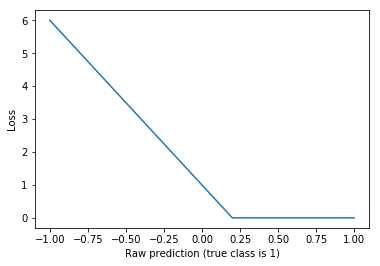

In [5]:
predictions = tf.linspace(-5., 5., 500)
target = tf.constant(1.)
min_sep = 1.
# Hinge loss - mostly used in SVMs, but can be used in neural networks as well

hinge_y_vals = tf.maximum(0., min_sep - tf.multiply(target, predictions))
with tf.Session() as sess:
    x_ = sess.run(x)
    y = sess.run(hinge_y_vals)
    
plt.plot(x_, y)
plt.xlabel('Raw prediction (true class is 1)')
plt.ylabel('Loss')
plt.show()
# Interpretation - we are doing binary classification. Our true class is 1. 
# We want a minimum separation of 1 between the prediction (raw score) and 
# true class.

### Binary cross entropy loss, or logistic loss

We are predicting loss between two classes (0 and 1), and raw scores are being used.


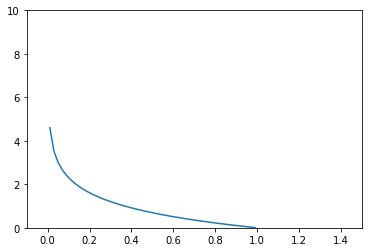

In [6]:
predictions = tf.linspace(-5., 5., 500)
target = tf.constant(1.)

xentropy_y_vals = - tf.multiply(target, tf.log(predictions)) - tf.multiply((1-target), tf.log(1-predictions))

with tf.Session() as sess:
    x = sess.run(predictions)
    y = sess.run(xentropy_y_vals)

plt.plot(x, y)
plt.xlim([-0.1, 1.5])
plt.ylim([0, 10])
plt.show()

### Sigmoid cross entropy loss (binary)

Raw scores are passed through sigmoid, then through cross entropy

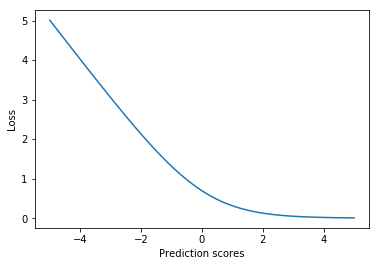

In [7]:
targets = tf.fill([500,], 1.)
predictions = tf.linspace(-5., 5., 500)

xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=predictions, labels=targets)

with tf.Session() as sess:
    x = sess.run(predictions)
    y = sess.run(xentropy_sigmoid_y_vals)
    
plt.plot(x, y)
plt.xlabel('Prediction scores')
plt.ylabel('Loss')
plt.show()

### Softmax cross entropy loss (binary)
Operates on non-normalized outputs. This function is used to measure a loss when there is only one target category instead of multiple. Because of this, the function transforms the outputs into a probability distribution via the softmax function and then computes the loss function from a true probability distribution

### TODO - complete the losses



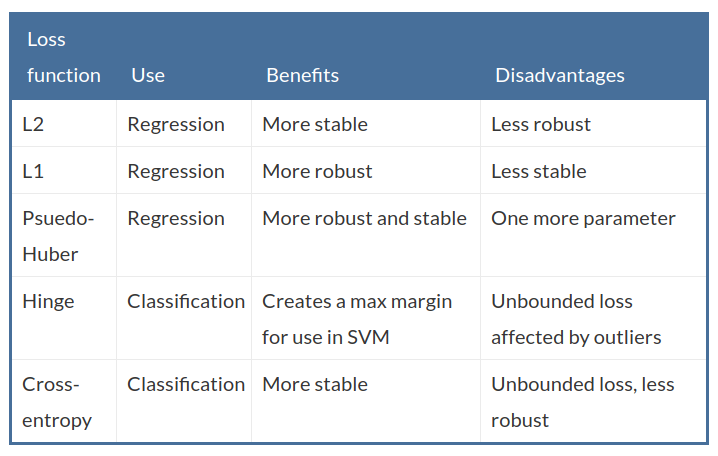

**Robustness, per wikipedia, is explained as:**

The method of least absolute deviations finds applications in many areas, due to its robustness compared to the least squares method. Least absolute deviations is robust in that it is resistant to outliers in the data. This may be helpful in studies where outliers may be safely and effectively ignored. If it is important to pay attention to any and all outliers, the method of least squares is a better choice.


**Stability, per wikipedia, is explained as:**

The instability property of the method of least absolute deviations means that, for a small horizontal adjustment of a datum, the regression line may jump a large amount. The method has continuous solutions for some data configurations; however, by moving a datum a small amount, one could “jump past” a configuration which has multiple solutions that span a region. After passing this region of solutions, the least absolute deviations line has a slope that may differ greatly from that of the previous line. In contrast, the least squares solutions is stable in that, for any small adjustment of a data point, the regression line will always move only slightly; that is, the regression parameters are continuous functions of the data.